In [ ]:
%load_ext autoreload
%autoreload 2

from utils import plot_utils
plot_utils.dark_mpl()

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp

from sklearn import preprocessing 

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Resources

- https://outline.com/xRsByu
- [this thread 1](https://stats.stackexchange.com/questions/307210/how-do-i-make-my-neural-network-better-at-predicting-sine-waves)
- [thread 2 - shorter](https://stackoverflow.com/questions/46995209/neural-network-toy-model-to-fit-sine-function-fails-whats-wrong)

## Tangentially related
- [cosine activation](https://analyticsindiamag.com/examining-the-sine-wave-as-an-alternate-activation-function-for-neural-networks/)

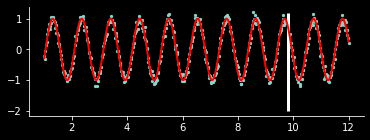

In [178]:
x = np.linspace(1,12,500)
y = np.sin(6*x)
nois_y = np.random.normal(size=len(x), scale=0.1) + y
plt.figure(figsize=(6,2))
plt.vlines(x[int(0.8*len(x))], -2, 1.2, lw=3)
plt.scatter(x,nois_y,s=5)
plt.plot(x,y, color='r', lw=2)
X, y = min_max_s.fit_transform(x.reshape(-1,1)), min_max_s.fit_transform(nois_y.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Text(0.5, 1.0, 'min val loss 0.08')

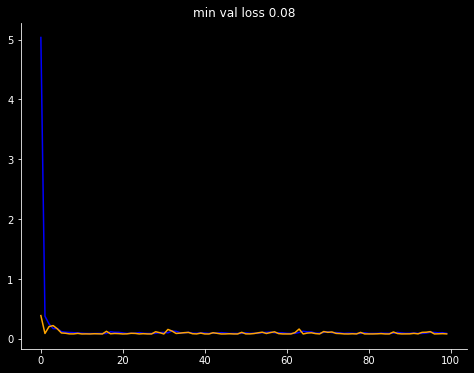

In [232]:

model = Sequential([
    Dense(252, activation='tanh'),
    Dense(252, activation='tanh'),
    Dense(252, activation='tanh'),
    Dense(252, activation='tanh'),
    Dense(252, activation='tanh'),
    Dense(252, activation='tanh'),
    Dense(252, activation='tanh'),
    Dense(252, activation='tanh'),
    Dense(252, activation='tanh'),
    Dense(252, activation='tanh'),
    Dense(252, activation='tanh'),
    Dense(252, activation='tanh'),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100 , batch_size=128, verbose=False)
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.title(f'min val loss {min(history.history["val_loss"]):.2f}')

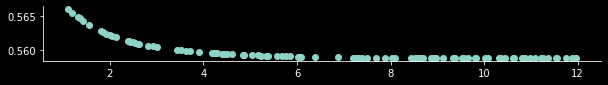

In [234]:
plt.figure(figsize=(10,1))
# plt.scatter(X_train, y_train)
plt.scatter(X_test, model.predict(X_test))